In [16]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np
from math import sqrt

import os
os.chdir("c:\\Users\\swart\\Desktop\\secure-mpc-main\\basic_networking")
from client import Client
from server import Server
os.chdir("c:\\Users\\swart\\Desktop\\secure-mpc-main\\ecgPreprocessedData")
from PickleFileUtils import read_in_pickle_file

In [17]:
# get list of euclidean distances normal
def euclidean_distance_normal(row1, row2):
	distance = 0.0
	for i in range(len(row1)):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

def get_distances_one_to_many_normal(test_point, point_arr):
	distances = []
	for point in point_arr:
		dist = euclidean_distance_normal(test_point, point)
		distances.append(dist)
	return distances
	


In [4]:
# get list of euclidean distnaces normal

def get_distances_one_to_many_secure(test_point, point_arr_x, point_arr_y, max_x_lagrange):
    alice = Client()
    server = Server()
    server.set_features_labels(point_arr_x, point_arr_y)
    distances_and_labels = alice.get_distances_and_labels(test_point, server, rand_range=max_x_lagrange)
    distances = list(zip(*distances_and_labels))[0]
    
    return distances


In [5]:
# get iris dataset
X_class,y_class = load_iris().data, load_iris().target

# we just want binary classification
X_class = X_class[:100]
y_class = y_class[:100]

# separate classes
X_class_1 = X_class[:50]
y_class_1 = y_class[:50]
X_class_2 = X_class[50:]
y_class_2 = y_class[50:]

print(y_class_1)
print(y_class_2)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [18]:
# normal distances x[0] to everything else
norm_dists = get_distances_one_to_many_normal(X_class[0], X_class[1:])
print(norm_dists)

# secure distances
secure_dists = get_distances_one_to_many_secure(X_class[0], X_class[1:], y_class[1:], 10000)
print(secure_dists)

[0.5385164807134502, 0.509901951359278, 0.648074069840786, 0.1414213562373093, 0.6164414002968979, 0.5196152422706632, 0.17320508075688762, 0.9219544457292882, 0.4690415759823426, 0.37416573867739483, 0.3741657386773941, 0.5916079783099616, 0.9949874371066197, 0.8831760866327848, 1.1045361017187267, 0.5477225575051664, 0.09999999999999998, 0.7416198487095667, 0.33166247903553986, 0.4358898943540679, 0.30000000000000016, 0.648074069840786, 0.46904157598234303, 0.5916079783099616, 0.5477225575051662, 0.316227766016838, 0.14142135623730995, 0.14142135623730995, 0.53851648071345, 0.5385164807134504, 0.3872983346207423, 0.6244997998398396, 0.8062257748298554, 0.4582575694955836, 0.37416573867739383, 0.41231056256176635, 0.24494897427831727, 0.866025403784438, 0.14142135623730964, 0.17320508075688743, 1.3490737563232043, 0.7681145747868601, 0.45825756949558394, 0.6164414002968975, 0.5916079783099616, 0.3605551275463989, 0.58309518948453, 0.30000000000000027, 0.22360679774997896, 4.0037482438

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def compare_dist_graph(test_row, point_arr_x, point_arr_y, dataset_name, max_x_lagrange, save_fig_path=""):
    norm_dists = get_distances_one_to_many_normal(test_row, point_arr_x)
    secure_dists = get_distances_one_to_many_secure(test_row, point_arr_x, point_arr_y, max_x_lagrange)

    N = len(point_arr_x)
    ind = np.arange(N)
    width = .35

    fig = plt.figure()
    ax = fig.add_subplot(111)

    normRects = ax.bar(ind, norm_dists, width, color="royalblue")
    secureRects = ax.bar(ind+width, secure_dists, width, color="seagreen")

    ax.set_ylabel('Distance')
    ax.set_xlabel('Sample number')
    ax.set_title(f'Traditional vs. Secure Euclidean Distances - {dataset_name} Dataset - Max x coordinate: {max_x_lagrange}')

    ax.legend((normRects[0], secureRects[0]), ('Normal', 'Secure'))

    if(save_fig_path != ""):
        plt.savefig(save_fig_path)
    else:
        plt.show()

def graphDifferencesInDistance(test_row, point_arr_x, point_arr_y, dataset_name, max_x_lagrange, save_fig_path=""):
    norm_dists = get_distances_one_to_many_normal(test_row, point_arr_x)
    secure_dists = get_distances_one_to_many_secure(test_row, point_arr_x, point_arr_y, max_x_lagrange)

    differences = []
    for x1, x2 in zip(norm_dists, secure_dists):
        diff = x1-x2
        differences.append(diff)

    N = len(point_arr_x)
    ind = np.arange(N)
    width = .35

    fig = plt.figure()
    ax = fig.add_subplot(111)

    diffRects = ax.bar(ind, differences, width, color="red")

    ax.set_ylabel('Difference in Distance')
    ax.set_xlabel('Sample number')
    ax.set_title(f'Secure Distance Subtracted from Normal Distance - {dataset_name} Dataset - Max x coordinate: {max_x_lagrange}')
    
    if(save_fig_path != ""):
        plt.savefig(save_fig_path)
    else:
        plt.show()


S(0):-0.0234375	(55556912581352.03, 91718965646079.22, 10613132744012.43)
S(0):-0.00390625	(48410790105132.016, 79921424577337.22, 9247996604228.422)
S(0):-1.0	(7051265259944800.0, 1.1641411641856338e+16, 1346920318425573.2)
S(0):-3.0	(7549645274632188.0, 1.246422097520554e+16, 1442119997967746.0)
S(0):-2.5	(5734402540538686.0, 9467313747336016.0, 1095375508682490.1)
S(0):-1.0	(2828421409369926.5, 4669632556689900.0, 540280104595207.44)
S(0):-4.75	(2688862679042140.0, 4439225620066722.5, 513621821712442.94)
S(0):-2.5	(5401863353296924.0, 8918302252932758.0, 1031854467261455.9)
S(0):-0.625	(1133745572773293.0, 1871777395853622.0, 216566088621027.72)
S(0):-5.0	(5763012743697811.0, 9514548246066864.0, 1100840595902978.4)
S(0):-1.75	(2907145222578979.0, 4799603038176918.0, 555317786856748.0)
S(0):-0.75	(2208065386964223.0, 3645444777479190.0, 421780774739567.6)
S(0):-3.5	(6054627834006582.0, 9995995361627016.0, 1156544397554512.8)
S(0):-3.25	(3814766539652452.0, 6298056587901020.0, 7286900

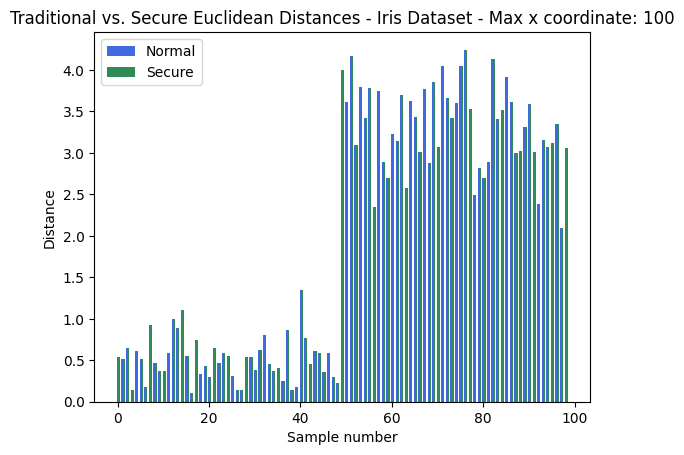

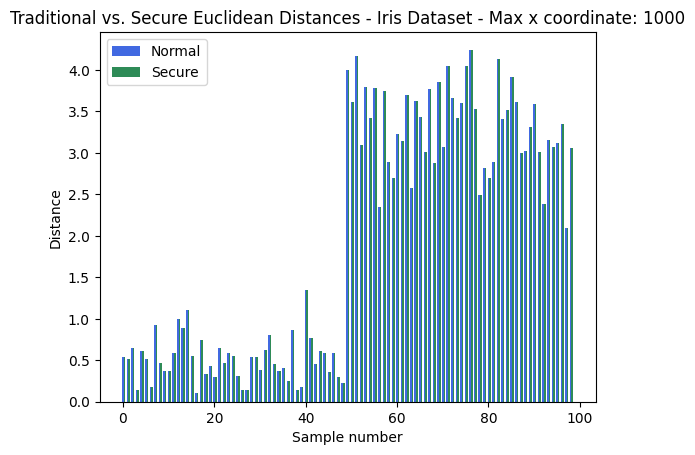

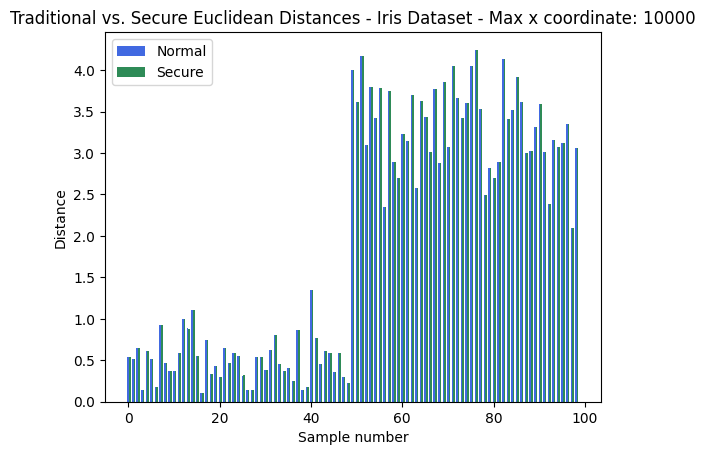

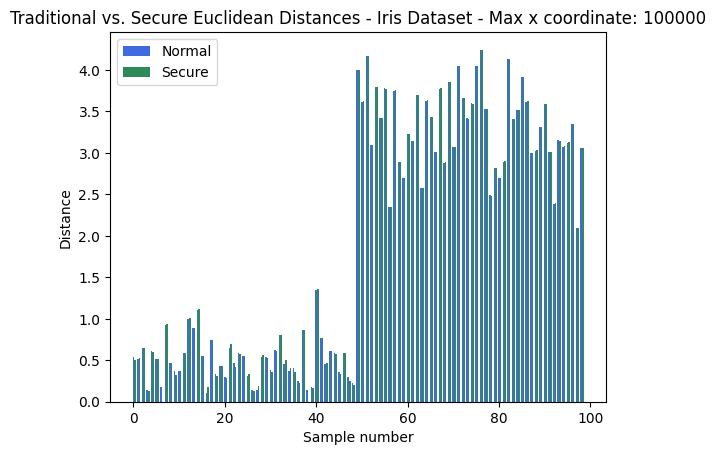

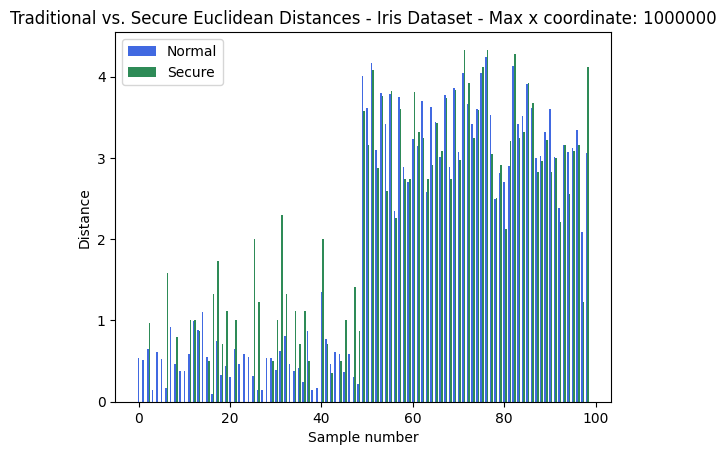

In [8]:
save_folder = os.chdir("c:\\Users\\swart\\Desktop\\secure-mpc-main\\distance_graphs\\graphs\\")


compare_dist_graph(X_class[0], X_class[1:], y_class[1:], "Iris", 100, f"compare_100")
compare_dist_graph(X_class[0], X_class[1:], y_class[1:], "Iris", 1000, f"compare_1000")
compare_dist_graph(X_class[0], X_class[1:], y_class[1:], "Iris", 10000, f"compare_10000")
compare_dist_graph(X_class[0], X_class[1:], y_class[1:], "Iris", 100000, f"compare_100000")
compare_dist_graph(X_class[0], X_class[1:], y_class[1:], "Iris", 1000000, f"compare_1000000")

S(0):-0.00390625	(37217271435708.02, 61442033231950.81, 7109679144890.621)
S(0):-0.00390625	(65515531514524.04, 108159661124772.42, 12515544229746.83)
S(0):-0.0859375	(84280203905352.02, 139138279053259.19, 16100191619357.412)
S(0):-0.03515625	(65636149959744.1, 108358789984130.47, 12538586353429.89)
S(0):-0.15625	(120996816172960.05, 199753773474112.0, 23114229022196.03)
S(0):-1.0	(4996787810189298.0, 8249535633312230.0, 954477618042738.0)
S(0):-1.0	(3334398102954195.5, 5504983768187904.0, 636930884262092.8)
S(0):-2.5	(6173540558413113.0, 1.0192316461924854e+16, 1179258880374587.8)
S(0):-1.0	(5178863492114872.0, 8550136700812221.0, 989257404777345.2)
S(0):-1.0	(5305005342375691.0, 8758392850414064.0, 1013352785522490.4)


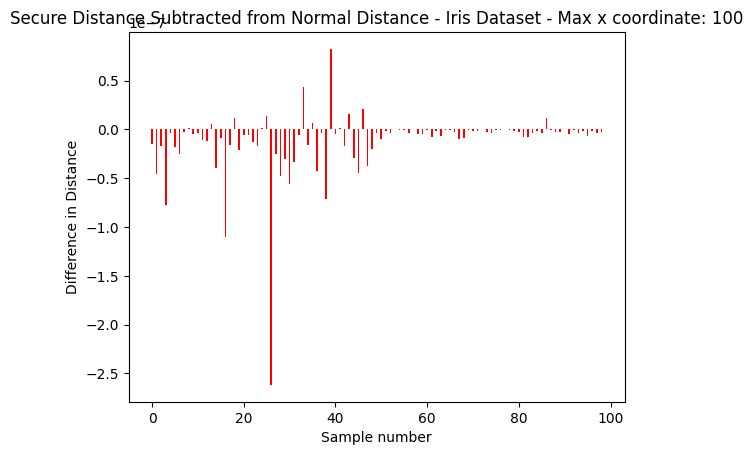

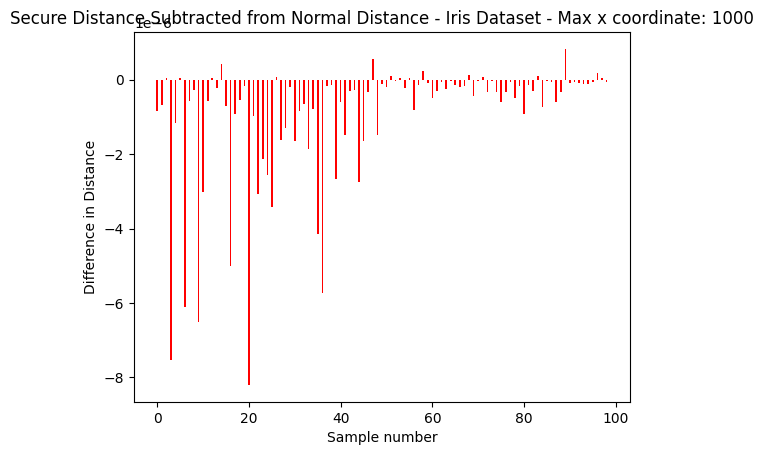

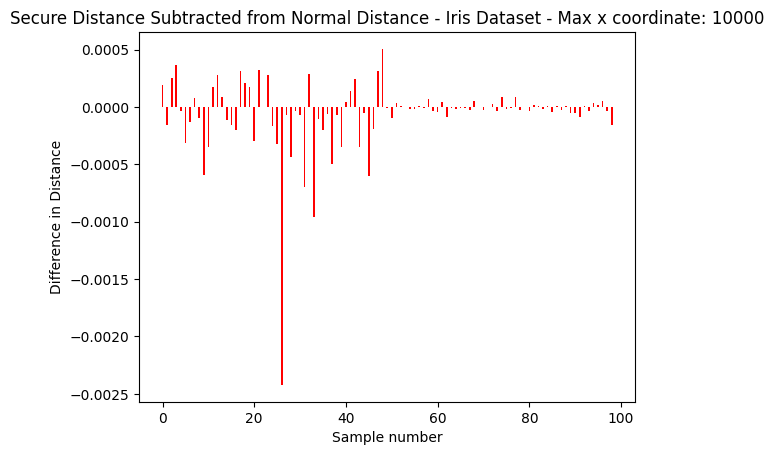

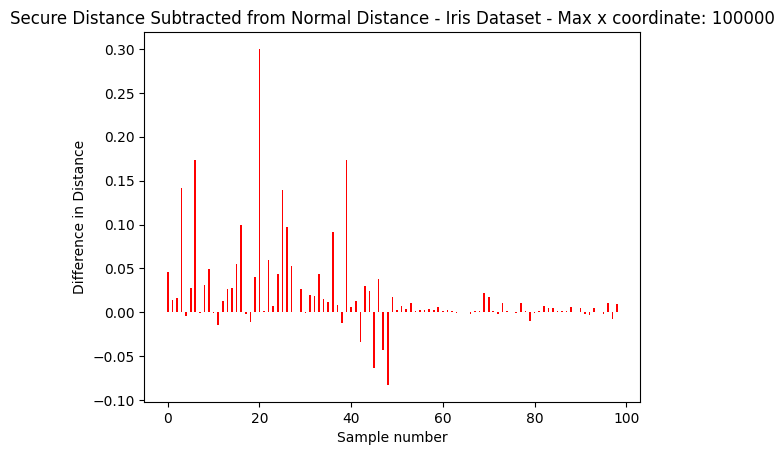

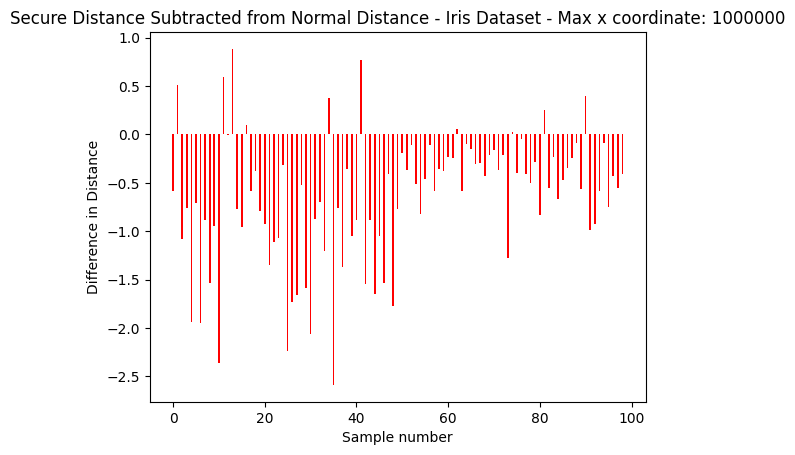

In [9]:
graphDifferencesInDistance(X_class[0], X_class[1:], y_class[1:], "Iris", 100, f"diffs_100")
graphDifferencesInDistance(X_class[0], X_class[1:], y_class[1:], "Iris", 1000, f"diffs_1000")
graphDifferencesInDistance(X_class[0], X_class[1:], y_class[1:], "Iris", 10000, f"diffs_10000")
graphDifferencesInDistance(X_class[0], X_class[1:], y_class[1:], "Iris", 100000, f"diffs_100000")
graphDifferencesInDistance(X_class[0], X_class[1:], y_class[1:], "Iris", 1000000, f"diffs_1000000")

In [10]:
def makeGraphs(test_point, X_class, y_class, x_lagrange_maxs, datasetname):
    file_names_compare = [f"compare_{datasetname}_{str(x)}" for x in x_lagrange_maxs]
    file_names_diffs = [f"diffs_{datasetname}{str(x)}" for x in x_lagrange_maxs]

    for i in range(len(x_lagrange_maxs)):
        graphDifferencesInDistance(test_point, X_class, y_class, datasetname, x_lagrange_maxs[i], file_names_diffs[i])
        compare_dist_graph(test_point, X_class, y_class, datasetname, x_lagrange_maxs[i], file_names_compare[i])



S(0):-0.0078125	(51005028809644.02, 84204255966516.42, 9743578512728.83)
S(0):-0.078125	(110619864349904.03, 182622451765582.4, 21131902697220.82)
S(0):-1.0	(3382673804430475.0, 5584685422515971.0, 646152405648235.2)
S(0):-0.5	(1839074273113671.5, 3036252341823501.0, 351296740489895.25)
S(0):-5.5	(5070978211427761.0, 8372021561160398.0, 968649360511574.2)
S(0):-0.5	(5279090953294336.0, 8715608976087728.0, 1008402700224822.9)
S(0):-1.125	(2025438368494839.2, 3343933457743507.0, 386895681654876.94)
S(0):-4.5	(5049535905594829.0, 8336621012541077.0, 964553484097747.8)
S(0):-2.25	(4376309358201570.5, 7225145691018110.0, 835954925958040.5)
S(0):-1.0	(4138238712861513.0, 6832098730778006.0, 790479088413160.0)
S(0):-1.0	(2881169365325505.5, 4756717756739519.0, 550355909702732.1)
S(0):-0.5	(3656583725419711.0, 6036901862223231.0, 698474205015496.9)
S(0):-1.125	(1548806970591058.0, 2557030385237786.0, 295850387679611.0)
S(0):-1.0	(1304426188781163.5, 2153565585004662.8, 249169204376755.72)
S(0)

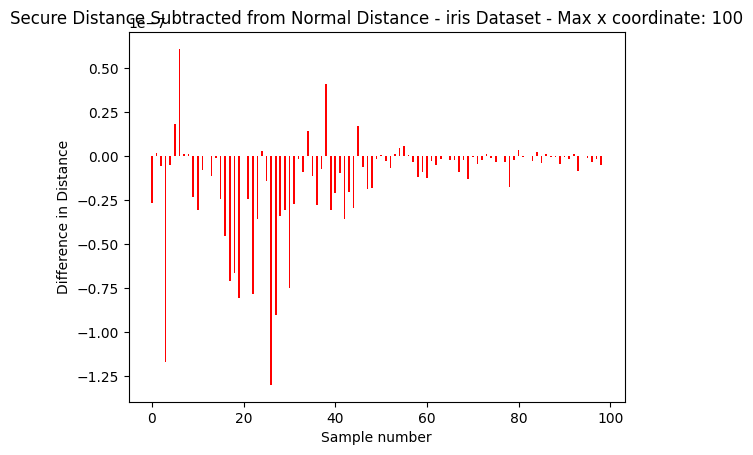

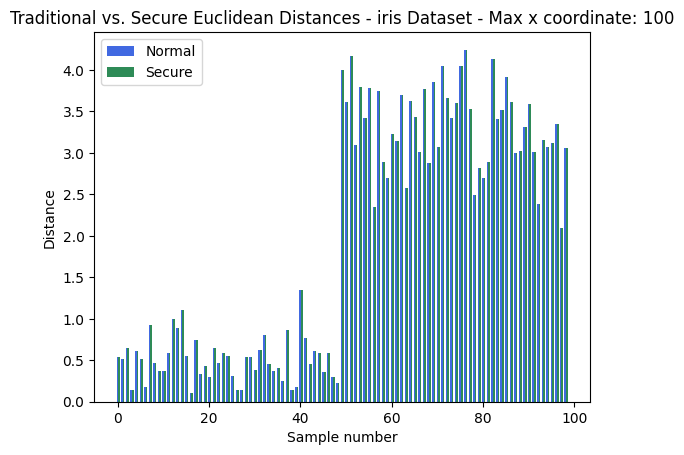

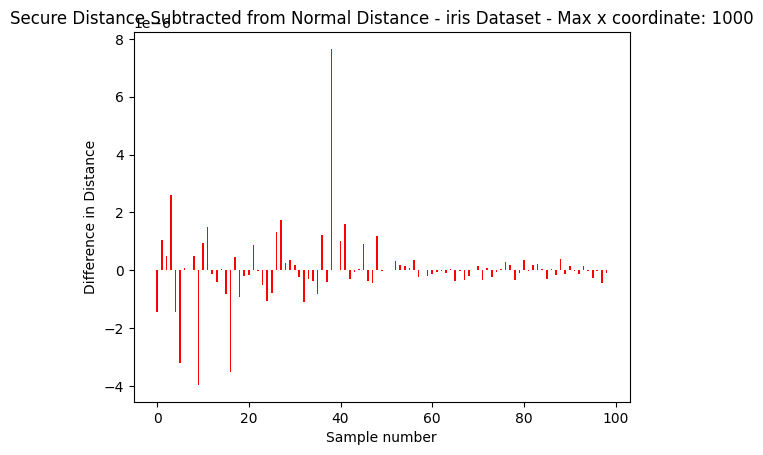

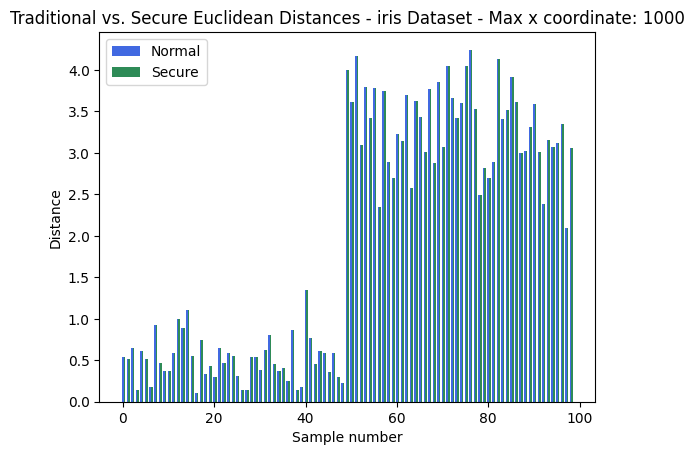

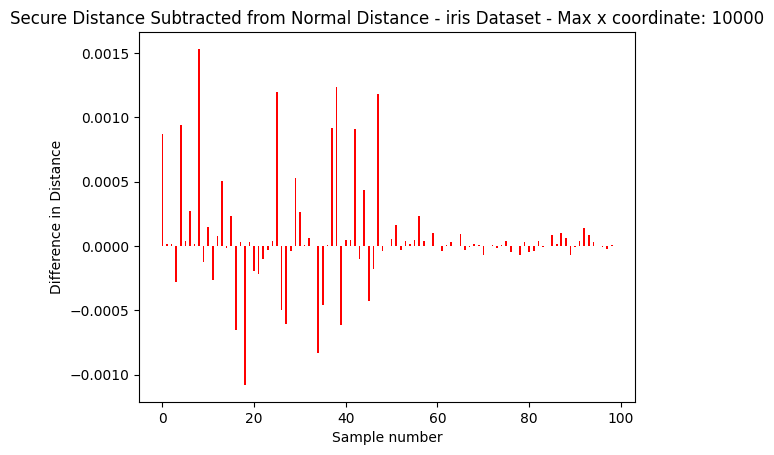

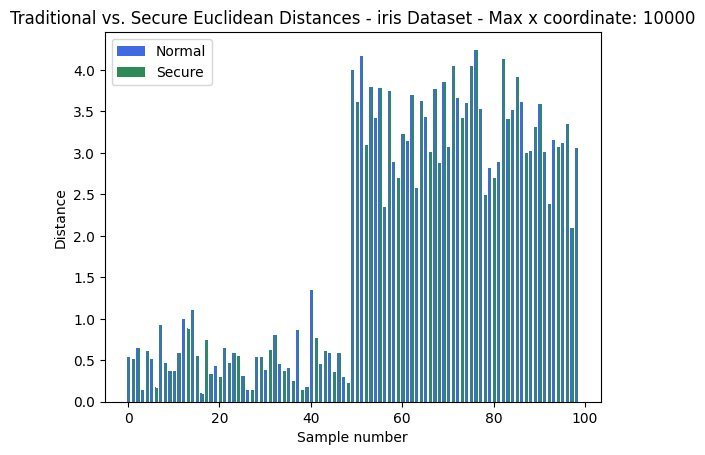

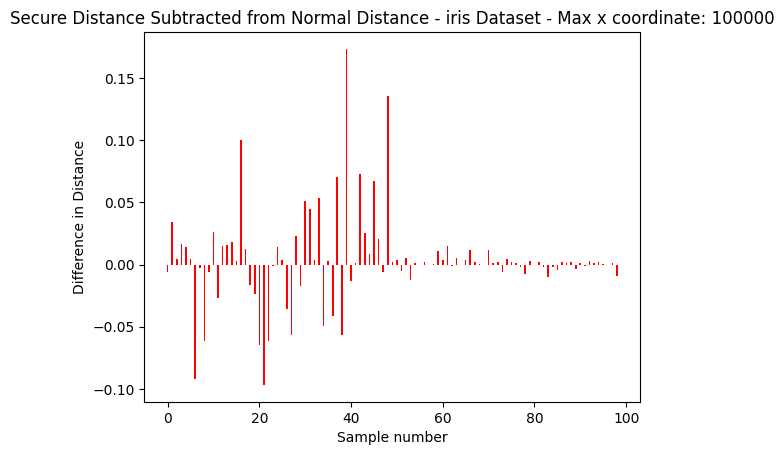

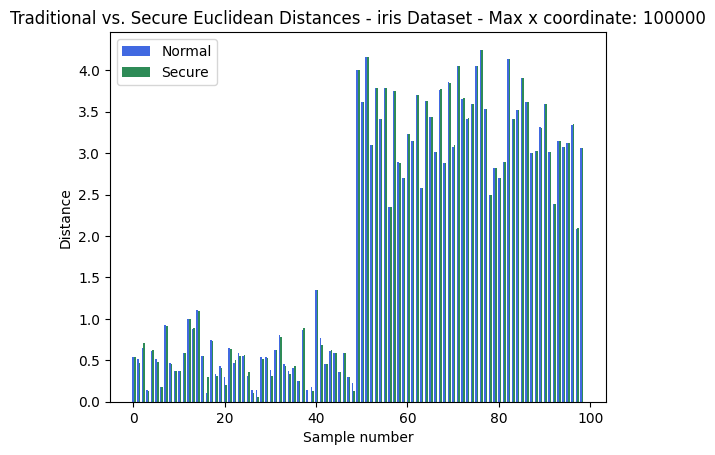

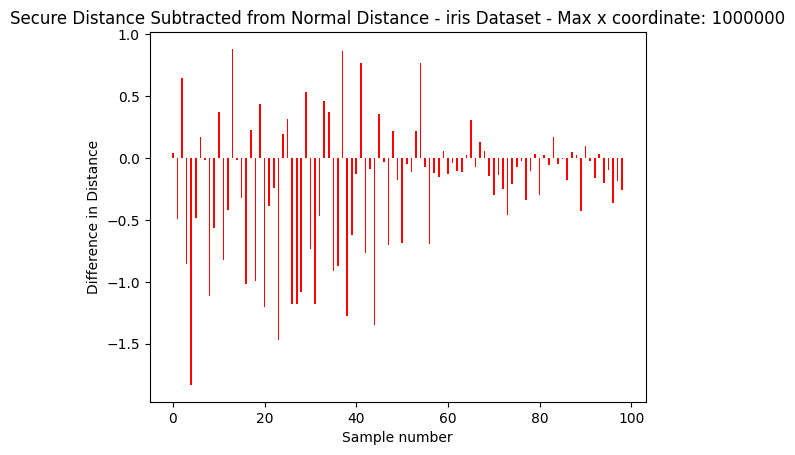

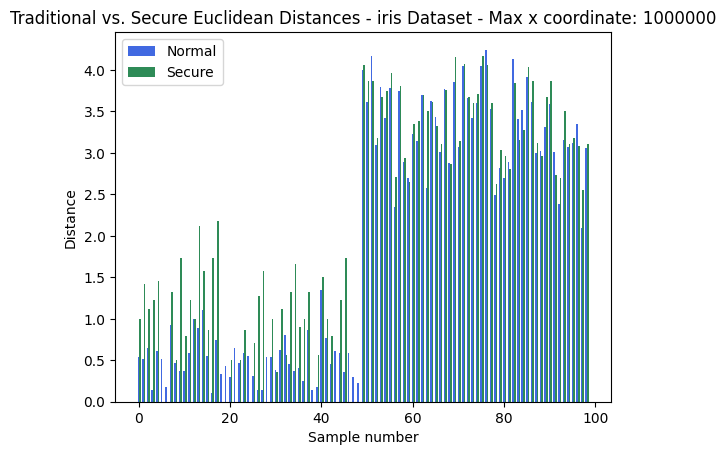

In [14]:
lagrance_maxes = [10**(x+2) for x in range(5)]

makeGraphs(X_class[0], X_class[1:], y_class[1:],lagrance_maxes, "iris")

In [19]:
save_folder = os.chdir("c:\\Users\\swart\\Desktop\\secure-mpc-main\\distance_graphs\\graphs\\")

complete_data_set = read_in_pickle_file("data\\CompleteDataSetFeatures.pickle")


FileNotFoundError: [Errno 2] No such file or directory: 'data\\CompleteDataSetFeatures.pickle'